In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.metrics import make_scorer
from scipy import stats

In [3]:
df=pd.read_csv('Life Expectancy Data.csv')

In [4]:
df.head()

Country  Year  Status  Life expectancy  Adult Mortality  infant deaths  \
0  Afghanistan  2015       0             65.0            263.0             62   
1  Afghanistan  2014       0             59.9            271.0             64   
2  Afghanistan  2013       0             59.9            268.0             66   
3  Afghanistan  2012       0             59.5            272.0             69   
4  Afghanistan  2011       0             59.2            275.0             71   

   Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0     0.01               71.279624         65.0      1154  ...   
1     0.01               73.523582         62.0       492  ...   
2     0.01               73.219243         64.0       430  ...   
3     0.01               78.184215         67.0      2787  ...   
4     0.01                7.097109         68.0      3013  ...   

   Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0               8.16         65.0        0.1  584.259210  33736494.0   
1               8.18         62.0        0.1  612.696514    327582.0   
2               8.13         64.0        0.1  631.744976  31731688.0   
3               8.52         67.0        0.1  669.959000   3696958.0   
4               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  Continent  
0                            0.479       10.1       Asia  
1                            0.476       10.0       Asia  
2                            0.470        9.9       Asia  
3                            0.463        9.8       Asia  
4                            0.454        9.5       Asia  

[5 rows x 23 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2015 entries, 0 to 2014
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2015 non-null   object 
 1   Year                             2015 non-null   int64  
 2   Status                           2015 non-null   int64  
 3   Life expectancy                  2014 non-null   float64
 4   Adult Mortality                  2014 non-null   float64
 5   infant deaths                    2015 non-null   int64  
 6   Alcohol                          1890 non-null   float64
 7   percentage expenditure           2015 non-null   float64
 8   Hepatitis B                      1814 non-null   float64
 9   Measles                          2015 non-null   int64  
 10  BMI                              2015 non-null   float64
 11  under-five deaths                2015 non-null   int64  
 12  Polio               

In [6]:
#Finding Null values
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      1
Adult Mortality                      1
infant deaths                        0
Alcohol                            125
percentage expenditure               0
Hepatitis B                        201
Measles                              0
BMI                                  0
under-five deaths                    0
Polio                                2
Total expenditure                  128
Diphtheria                           2
 HIV/AIDS                            0
GDP                                 17
Population                          33
 thinness  1-19 years                0
 thinness 5-9 years                  0
Income composition of resources      0
Schooling                            0
Continent                            1
dtype: int64

In [7]:
#Analyzing the data
df.describe()

Year       Status  Life expectancy  Adult Mortality  \
count  2015.000000  2015.000000      2014.000000       2014.00000   
mean   2007.693300     0.130521        68.520457        173.60427   
std       4.587907     0.336959         9.180826        127.18522   
min    2000.000000     0.000000        43.100000          1.00000   
25%    2004.000000     0.000000        62.900000         79.50000   
50%    2008.000000     0.000000        71.100000        152.00000   
75%    2012.000000     0.000000        74.775000        235.00000   
max    2015.000000     1.000000        89.000000        723.00000   

       infant deaths      Alcohol  percentage expenditure  Hepatitis B  \
count    2015.000000  1890.000000             2015.000000  1814.000000   
mean       36.449628     4.353714              595.416565    79.567806   
std       139.350844     3.953520             1617.748749    25.390944   
min         0.000000     0.010000                0.000000     2.000000   
25%         1.000000     0.620000               19.868603    75.000000   
50%         4.000000     3.630000               88.629458    91.000000   
75%        24.000000     7.185000              427.646988    96.000000   
max      1800.000000    17.870000            18961.348600    99.000000   

            Measles           BMI  ...        Polio  Total expenditure  \
count    2015.000000  2015.000000  ...  2013.000000        1887.000000   
mean     2750.838213    37.041390  ...    81.635867           5.845734   
std     12209.501296    19.867665  ...    23.673916           2.259131   
min         0.000000     1.400000  ...     3.000000           0.370000   
25%         0.000000    18.500000  ...    77.000000           4.340000   
50%        20.000000    41.100000  ...    92.000000           5.700000   
75%       467.500000    55.400000  ...    97.000000           7.270000   
max    212183.000000    77.600000  ...    99.000000          14.390000   

       Diphtheria      HIV/AIDS            GDP    Population  \
count  2013.000000  2015.000000    1998.000000  1.982000e+03   
mean     81.990065     2.098213    5169.724705  1.400192e+07   
std      23.304278     5.929765   10849.953164  6.533392e+07   
min       2.000000     0.100000       1.681350  3.400000e+01   
25%      78.000000     0.100000     422.548069  2.156655e+05   
50%      91.000000     0.100000    1412.318395  1.458058e+06   
75%      96.000000     0.900000    4567.918660  7.971562e+06   
max      99.000000    50.600000  119172.741800  1.293859e+09   

        thinness  1-19 years   thinness 5-9 years  \
count            2015.000000          2015.000000   
mean                5.140149             5.219107   
std                 4.727900             4.826701   
min                 0.100000             0.100000   
25%                 1.700000             1.700000   
50%                 3.400000             3.400000   
75%                 7.400000             7.500000   
max                27.700000            28.600000   

       Income composition of resources    Schooling  
count                      2015.000000  2015.000000  
mean                          0.613016    11.823325  
std                           0.197885     3.078893  
min                           0.000000     0.000000  
25%                           0.487000    10.000000  
50%                           0.657000    12.000000  
75%                           0.746500    13.850000  
max                           0.937000    20.700000  

[8 rows x 21 columns]

In [8]:
# select numerical columns
df_numeric = df.select_dtypes(include=[np.number])
numeric_cols = df_numeric.columns.values
# select non-numeric columns
df_non_numeric = df.select_dtypes(exclude=[np.number])
non_numeric_cols = df_non_numeric.columns.values

In [9]:
# % of values missing in each column
values_list = list()
cols_list = list()
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())*100
    cols_list.append(col)
    values_list.append(pct_missing)
pct_missing_df = pd.DataFrame()
pct_missing_df['col'] = cols_list
pct_missing_df['pct_missing'] = values_list

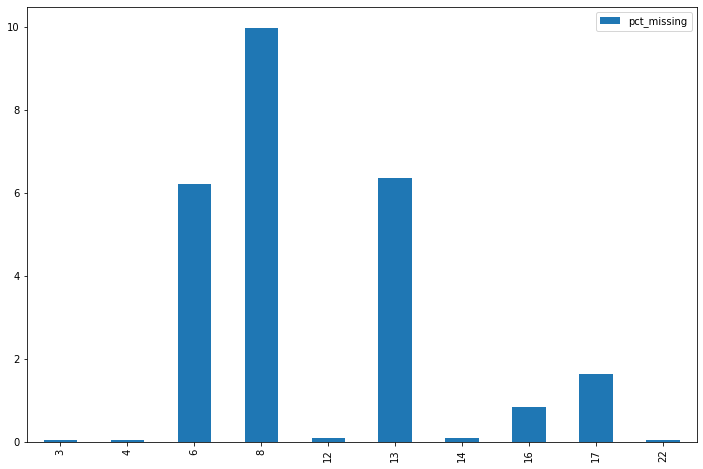

In [10]:
pct_missing_df.loc[pct_missing_df.pct_missing > 0].plot(kind='bar', figsize=(12,8))
plt.show()

In [11]:
df.shape

(2015, 23)

In [12]:
df=df.dropna()

In [13]:
df.shape

(1647, 23)

<AxesSubplot:xlabel='Status'>

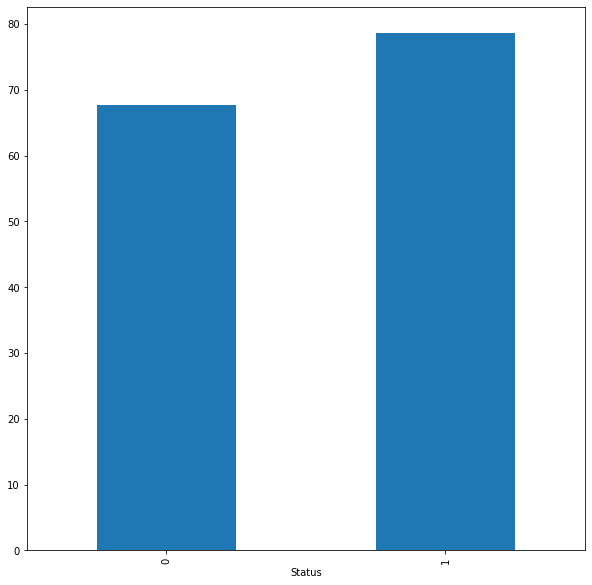

In [14]:
plt.figure(figsize=(10,10))
df.groupby(['Status'])['Life expectancy'].mean().plot(kind='bar')

In [15]:
status_counts = df['Status'].value_counts()
status_counts

0    1405
1     242
Name: Status, dtype: int64

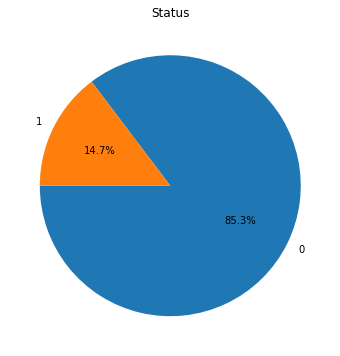

In [16]:
plt.figure(figsize=(12,6))
plt.title('Status')
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=180);

In [17]:
distinct_countries = df['Country'].unique()
distinct_countries

array(['Afghanistan', 'Albania', 'Algeria', 'Angola', 'Argentina',
       'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon',
       'Canada', 'Central African Republic', 'Chad', 'Chile', 'China',
       'Colombia', 'Comoros', 'Costa Rica', 'Croatia', 'Cyprus',
       'Djibouti', 'Dominican Republic', 'Ecuador', 'El Salvador',
       'Equatorial Guinea', 'Eritrea', 'Estonia', 'Ethiopia', 'Fiji',
       'France', 'Gabon', 'Georgia', 'Germany', 'Ghana', 'Greece',
       'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti',
       'Honduras', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Israel',
       'Italy', 'Jamaica', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati',
       'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Lithuania',
       'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia'

In [18]:
df_outliers=df.drop(['Continent','Country'], axis=1)

C:\Users\mayab\anaconda3\envs\ImageProcessing\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mayab\anaconda3\envs\ImageProcessing\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mayab\anaconda3\envs\ImageProcessing\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

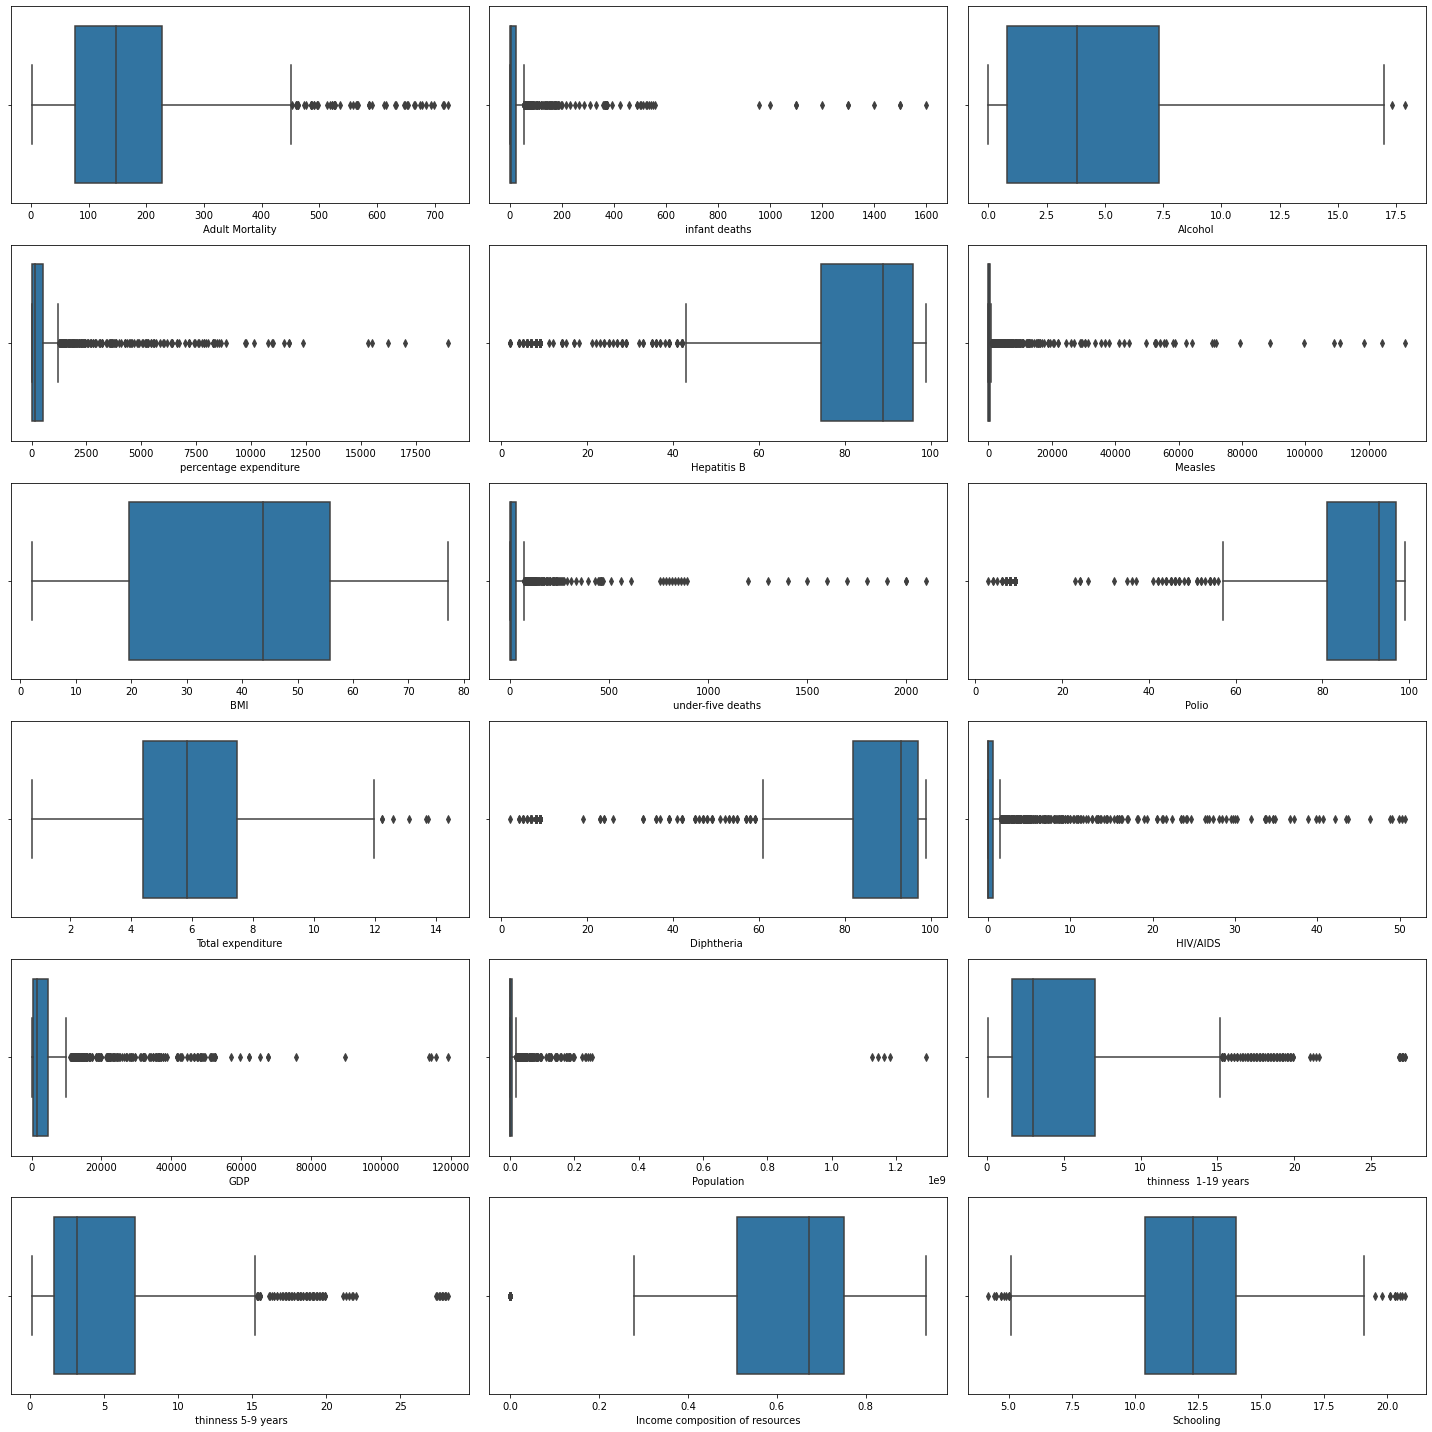

In [19]:
plt.figure(figsize=(20,20))
column_list=list(df_outliers.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(6,3,plt_num)
        sns.boxplot(df[i])
        plt_num=plt_num+1
    else:
        plt.subplot(5,4,plt_num)
        sns.boxplot(df[i])
        plt_num=plt_num+1
plt.tight_layout()


In [20]:
for i in column_list:
    iqr=df_outliers[i].quantile(0.75)-df_outliers[i].quantile(0.25)
    lower_boundary=df_outliers[i].quantile(0.25)-1.5*iqr
    upper_boundary=df_outliers[i].quantile(0.75)+1.5*iqr
    print("The column {} has {} outliers percentage {} %".format(i,df_outliers[df_outliers[i]> upper_boundary].shape[0]+df_outliers[df_outliers[i]< lower_boundary].shape[0],(df_outliers[df_outliers[i]> upper_boundary].shape[0]+df_outliers[df_outliers[i]< lower_boundary].shape[0])*100/2938))

The column Adult Mortality has 54 outliers percentage 1.8379850238257318 %
The column infant deaths has 198 outliers percentage 6.73927842069435 %
The column Alcohol has 2 outliers percentage 0.06807351940095303 %
The column percentage expenditure has 187 outliers percentage 6.364874063989109 %
The column Hepatitis B has 176 outliers percentage 5.990469707283866 %
The column Measles  has 296 outliers percentage 10.074880871341048 %
The column BMI has 0 outliers percentage 0.0 %
The column under-five deaths  has 221 outliers percentage 7.522123893805309 %
The column Polio has 142 outliers percentage 4.833219877467665 %
The column Total expenditure has 7 outliers percentage 0.2382573179033356 %
The column Diphtheria  has 133 outliers percentage 4.526889040163376 %
The column  HIV/AIDS has 298 outliers percentage 10.142954390742002 %
The column GDP has 208 outliers percentage 7.079646017699115 %
The column Population has 233 outliers percentage 7.930565010211028 %
The column  thinness  1-

In [21]:
for i in column_list:
    IQR=df_outliers[i].quantile(0.75)-df_outliers[i].quantile(0.25)
    lower_boundary=df_outliers[i].quantile(0.25)-(IQR*1.5)
    upper_boundary=df_outliers[i].quantile(0.75)+(IQR*1.5)
    df_outliers.loc[df_outliers[i]>upper_boundary,i]=upper_boundary
    df_outliers.loc[df_outliers[i]<lower_boundary,i]=lower_boundary

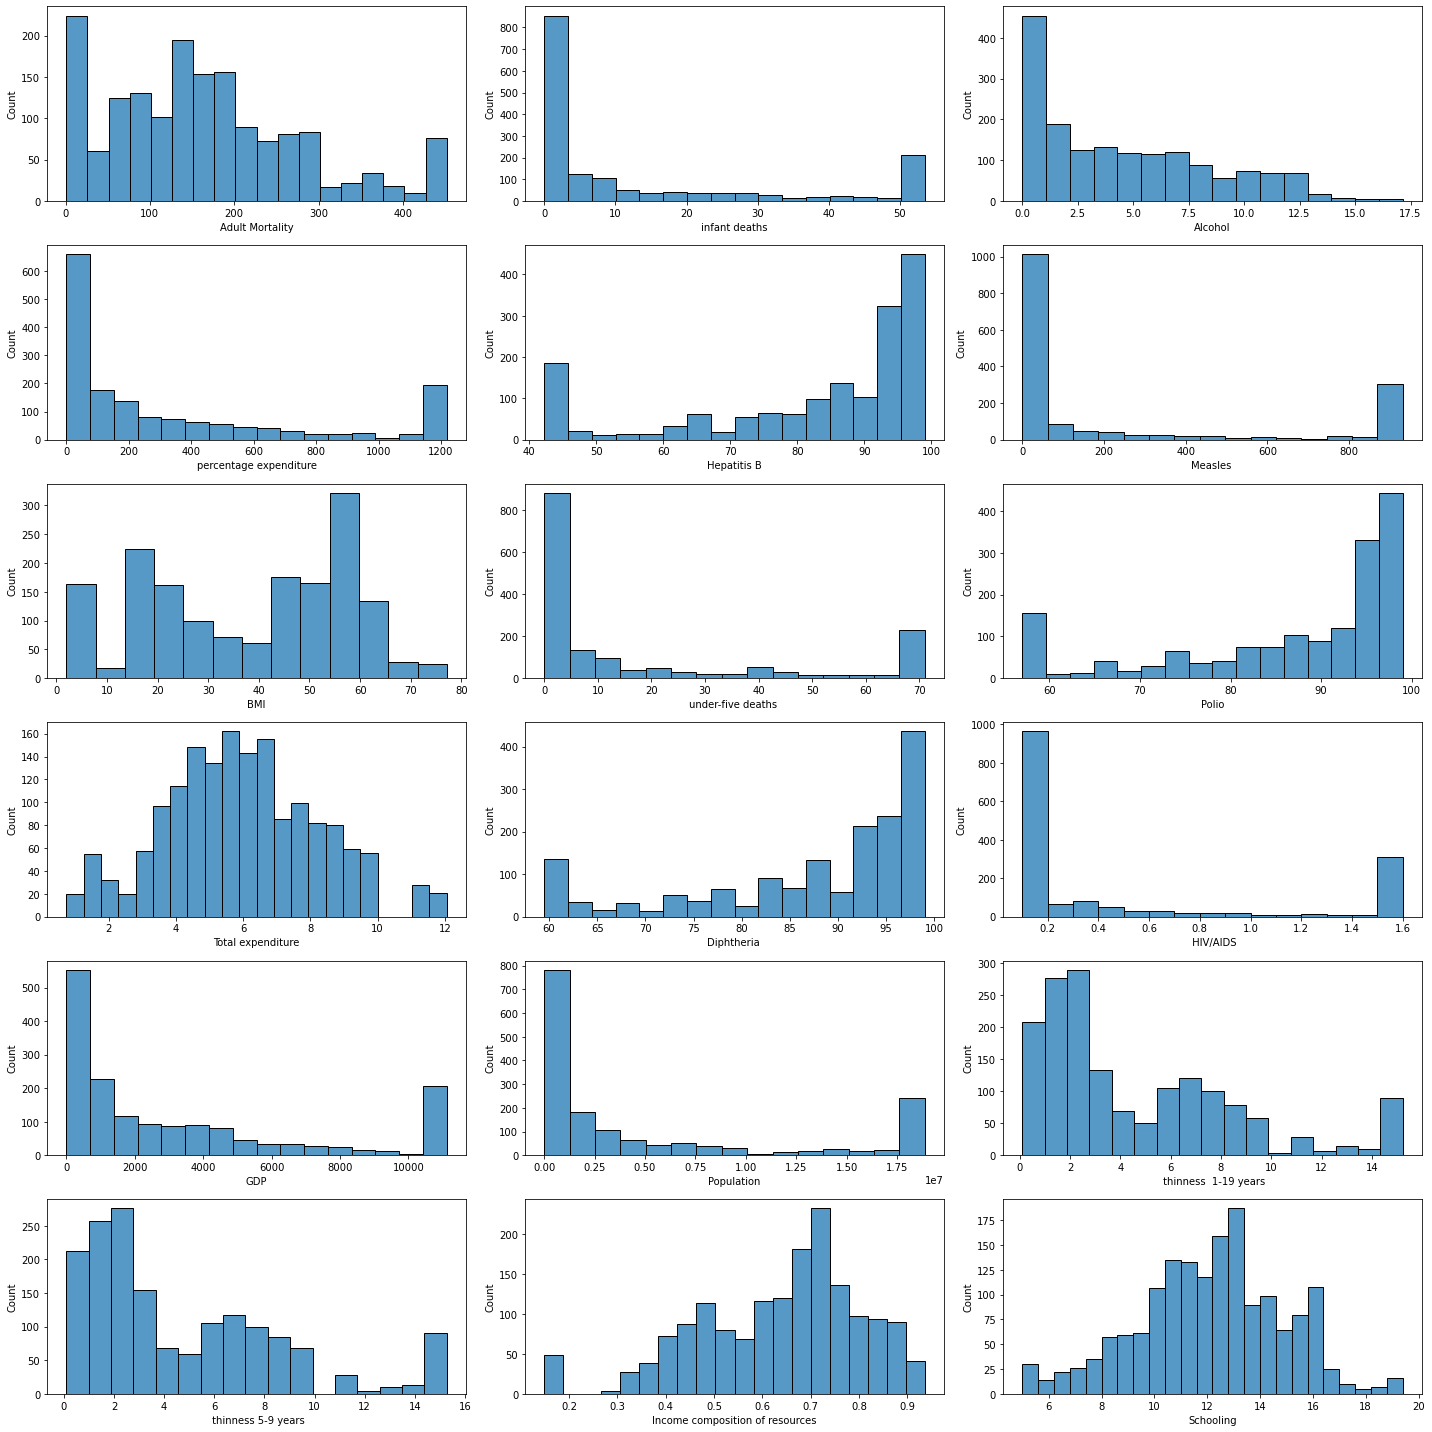

In [22]:
plt.figure(figsize=(20,20))
column_list=list(df_outliers.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(6,3,plt_num)
        sns.histplot(df_outliers[i])
        plt_num=plt_num+1
    else:
        plt.subplot(6,3,plt_num)
        sns.histplot(df_outliers[i])
        plt_num=plt_num+1
plt.tight_layout()

In [23]:
for i in column_list:
    IQR=df_outliers[i].quantile(0.75)-df_outliers[i].quantile(0.25)
    lower_boundary=df_outliers[i].quantile(0.25)-(IQR*1.5)
    upper_boundary=df_outliers[i].quantile(0.75)+(IQR*1.5)
    df_outliers.loc[df_outliers[i]>upper_boundary,i]=upper_boundary
    df_outliers.loc[df_outliers[i]<lower_boundary,i]=lower_boundary

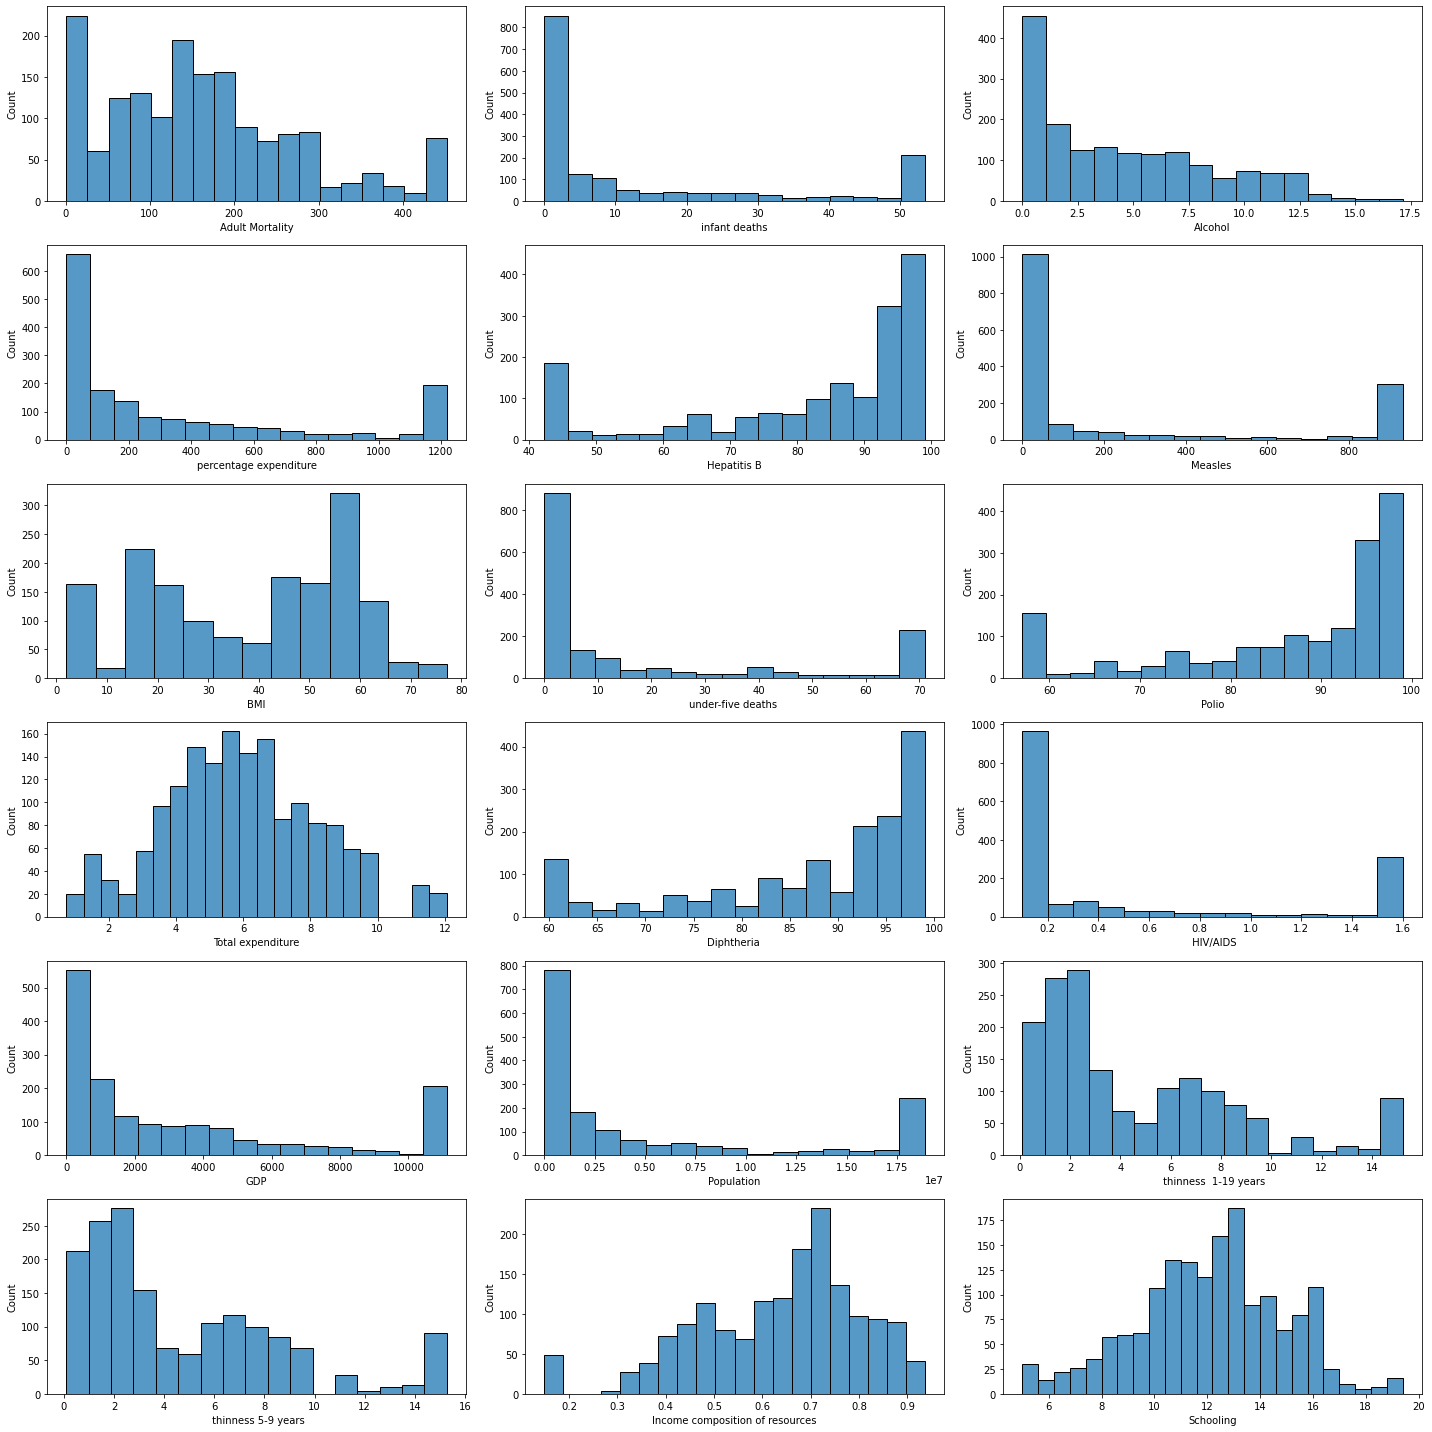

In [24]:
plt.figure(figsize=(20,20))
column_list=list(df_outliers.columns)[3:]
plt_num=1
for i in column_list:
    if plt_num<=18:
        plt.subplot(6,3,plt_num)
        sns.histplot(df_outliers[i])
        plt_num=plt_num+1
    else:
        plt.subplot(6,3,plt_num)
        sns.histplot(df_outliers[i])
        plt_num=plt_num+1
plt.tight_layout()

<AxesSubplot:xlabel='Life expectancy', ylabel='Count'>

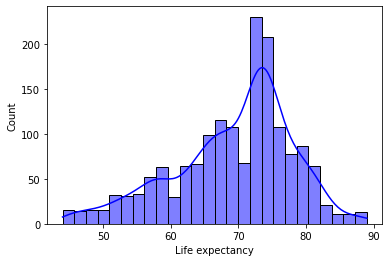

In [25]:
sns.histplot(df['Life expectancy'],kde=True,color='blue')

the majority of lifespane lies between 45 years and 90 years with an average of 69 years

<AxesSubplot:>

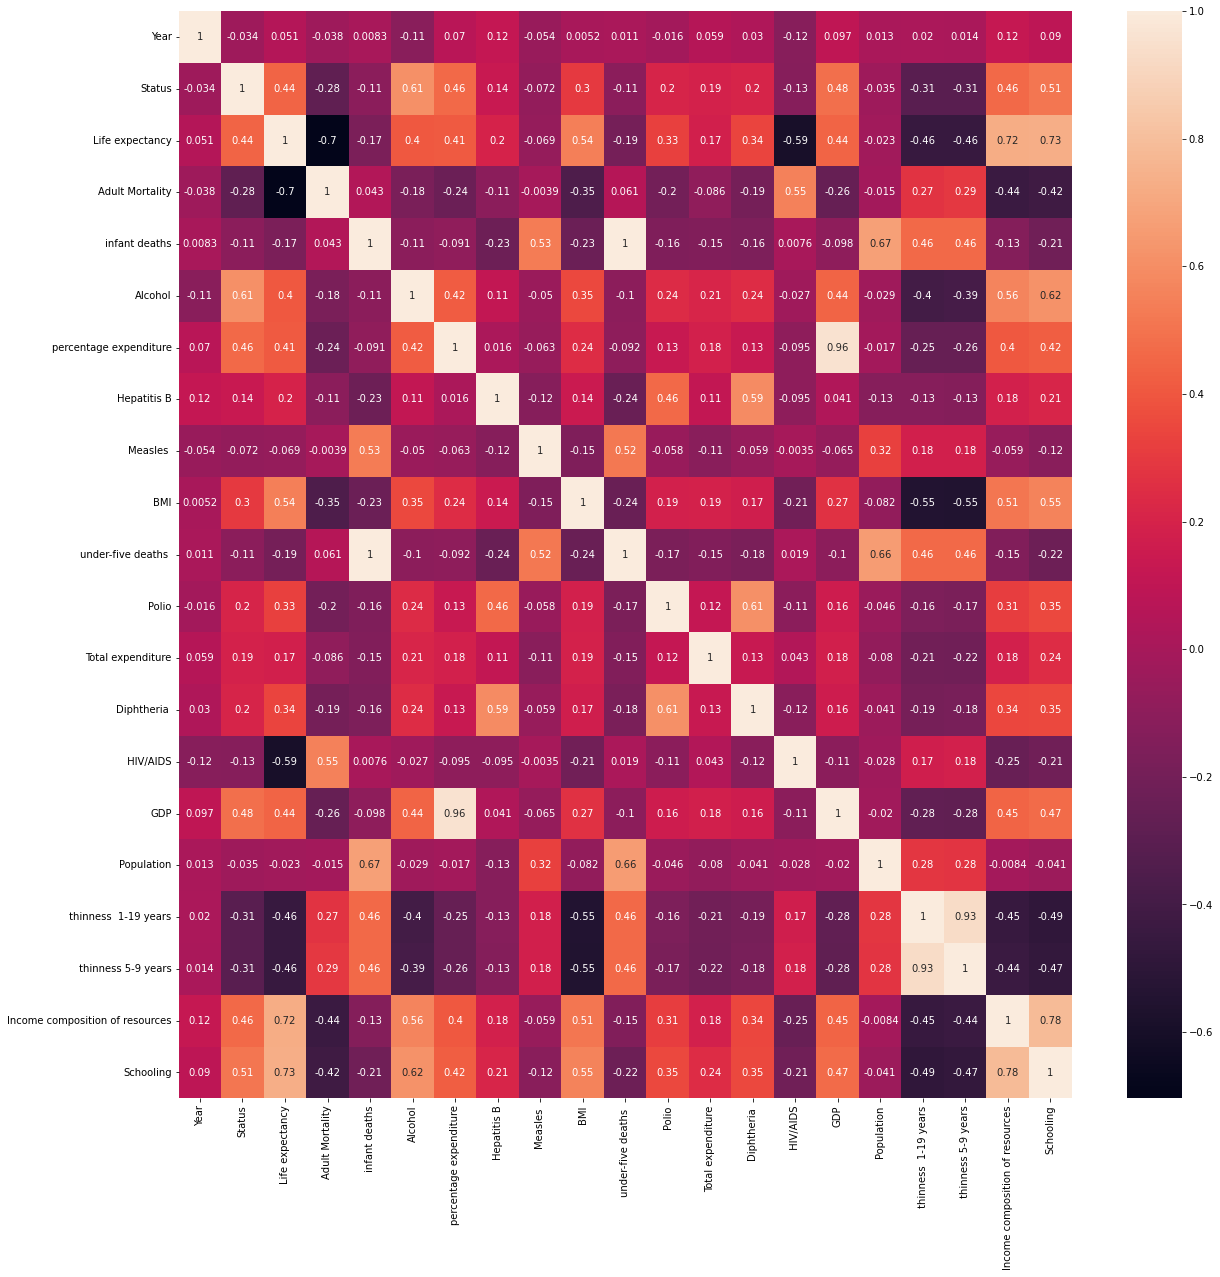

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)


In [27]:
df.shape

(1647, 23)

In [28]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', 'BMI', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling', 'Continent'],
      dtype='object')

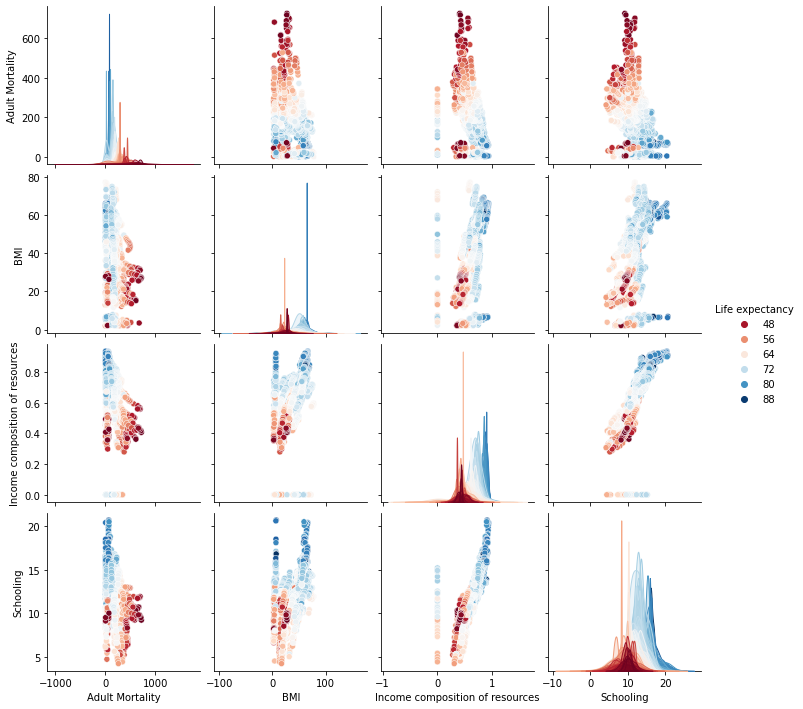

In [29]:
cols = ['Life expectancy',
        'Adult Mortality',
        'BMI', 
        'Income composition of resources', 
        'Schooling']

sns.pairplot(data=df[cols], hue='Life expectancy', palette='RdBu')

<AxesSubplot:xlabel='BMI', ylabel='Life expectancy'>

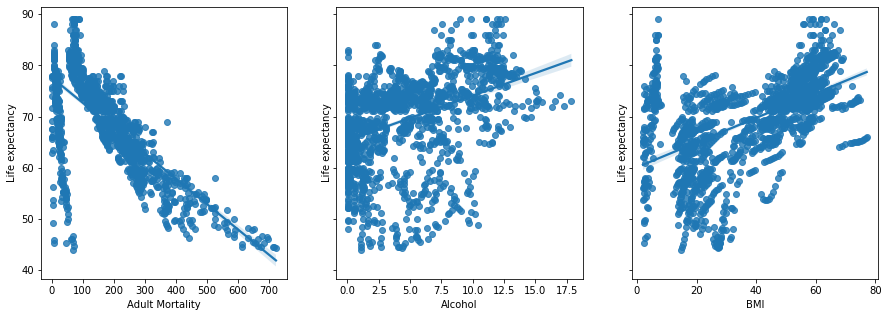

In [30]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df['Adult Mortality'], y=df['Life expectancy'], ax=ax1)
sns.regplot(x=df['Alcohol'], y=df['Life expectancy'], ax=ax2)
sns.regplot(x=df['BMI'], y=df['Life expectancy'], ax=ax3)

<AxesSubplot:xlabel='GDP', ylabel='Life expectancy'>

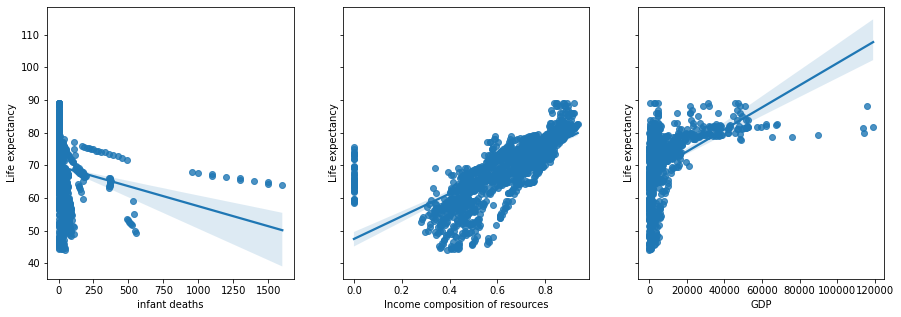

In [31]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df['infant deaths'], y=df['Life expectancy'], ax=ax1)
sns.regplot(x=df['Income composition of resources'], y=df['Life expectancy'], ax=ax2)
sns.regplot(x=df['GDP'], y=df['Life expectancy'], ax=ax3)

<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy'>

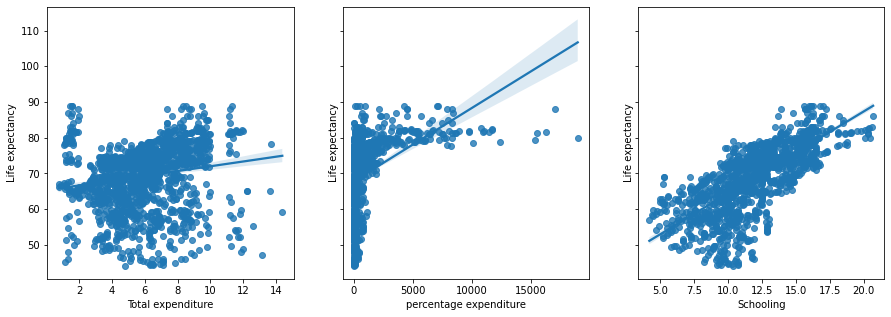

In [32]:

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df['Total expenditure'], y=df['Life expectancy'], ax=ax1)
sns.regplot(x=df['percentage expenditure'], y=df['Life expectancy'], ax=ax2)
sns.regplot(x=df['Schooling'], y=df['Life expectancy'], ax=ax3)

<AxesSubplot:xlabel=' thinness 5-9 years', ylabel='Life expectancy'>

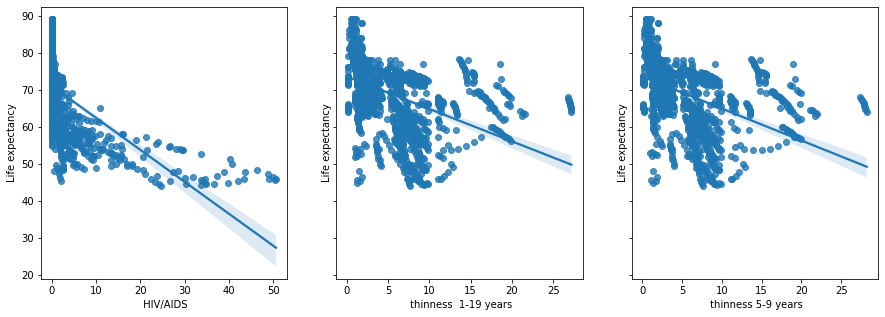

In [33]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True, figsize=(15,5))
sns.regplot(x=df[' HIV/AIDS'], y=df['Life expectancy'], ax=ax1)
sns.regplot(x=df[' thinness  1-19 years'], y=df['Life expectancy'], ax=ax2)
sns.regplot(x=df[' thinness 5-9 years'], y=df['Life expectancy'], ax=ax3) 

In [34]:
life_expectancy_status_df = round(df.groupby(['Status','Year'])['Life expectancy'].mean(), 2)
life_expectancy_status_df = life_expectancy_status_df.reset_index()
life_expectancy_status_df.pivot(index='Year', columns='Status')

Life expectancy       
Status               0      1
Year                         
2000             68.61  76.08
2001             68.56  76.57
2002             66.85  76.86
2003             66.68  77.21
2004             66.82  77.91
2005             66.92  78.31
2006             67.46  78.41
2007             67.25  78.46
2008             67.29  77.88
2009             67.39  78.34
2010             67.56  79.39
2011             68.00  80.72
2012             68.51  80.27
2013             68.75  80.30
2014             68.74  81.03
2015             71.40    NaN

<AxesSubplot:xlabel='Status'>

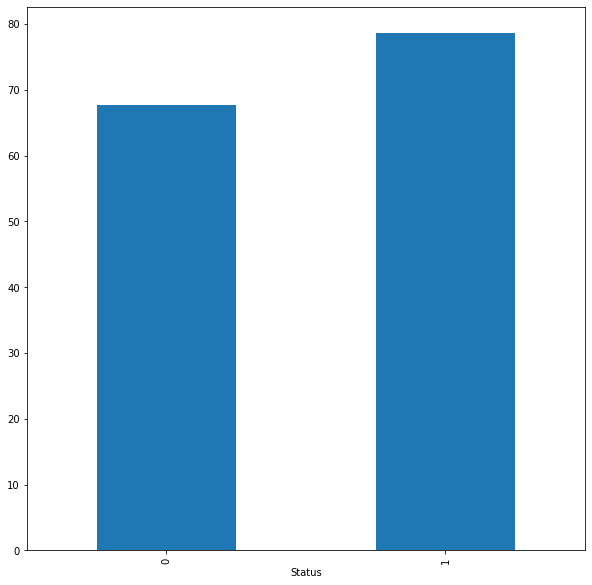

In [35]:
#Identifying relationship between Country Status and Life Expectancy 
plt.figure(figsize=(10,10))
df.groupby(['Status'])['Life expectancy'].mean().plot(kind='bar')

In [36]:
import plotly.express as px

In [37]:
fig=px.scatter(df, x='GDP',y='Life expectancy',size='Population',color='Continent',hover_name='Country',log_x=True,size_max=40)
fig.show()

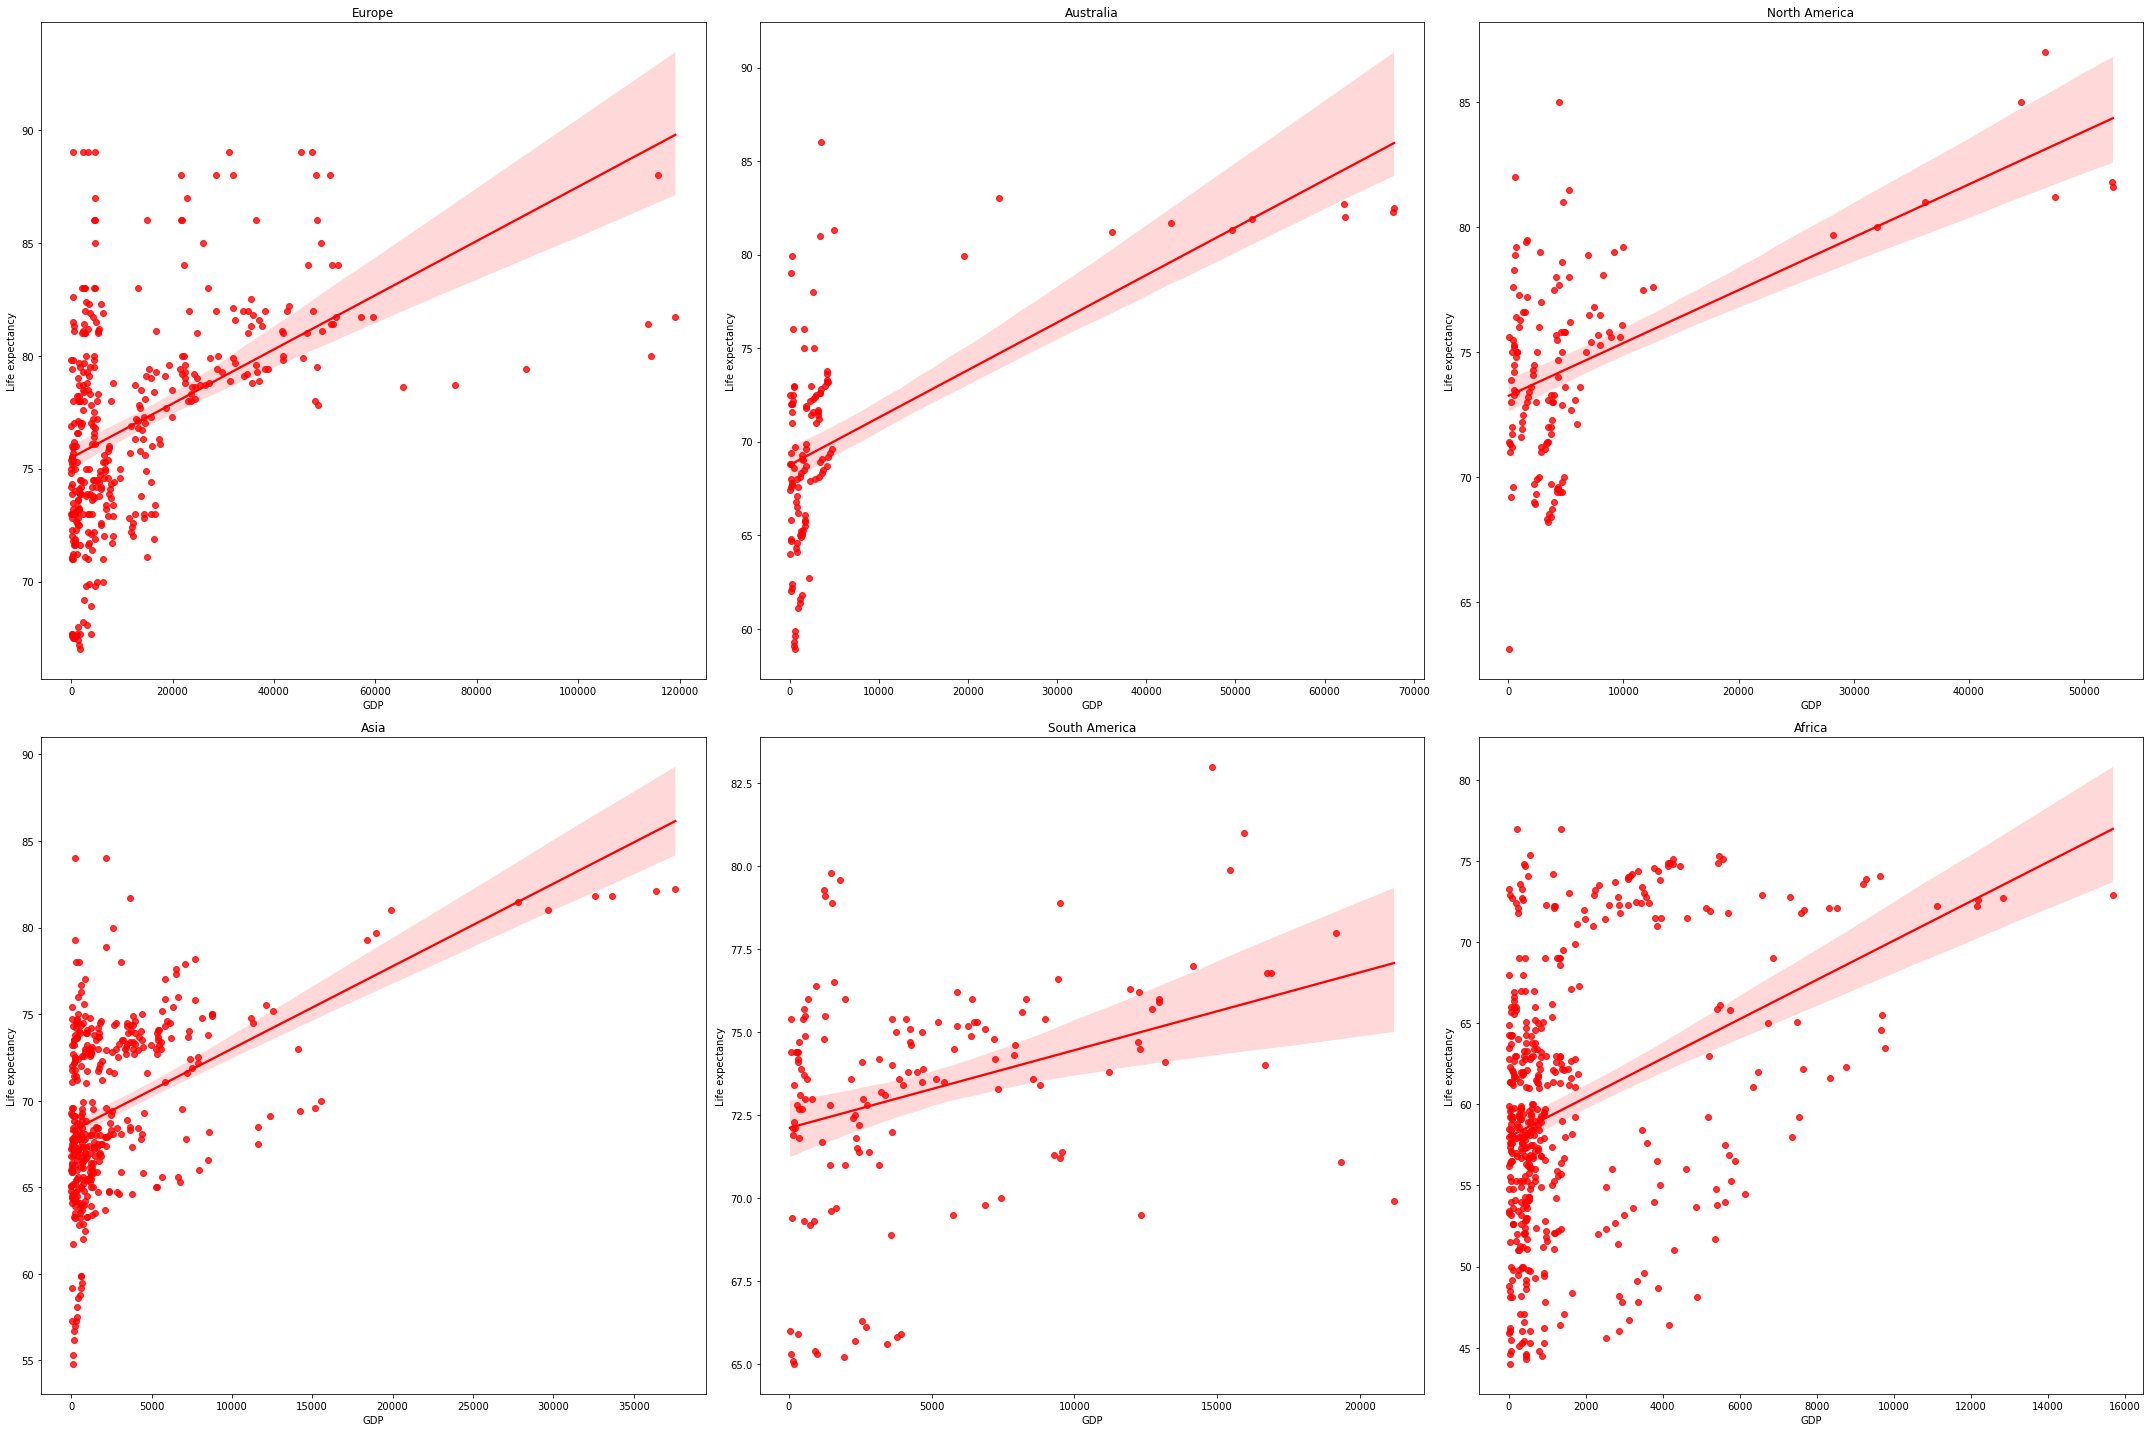

In [38]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
for continent, ax in zip(set(df['Continent']), axs.flat):
    continents = df[df['Continent'] == continent]
    sns.regplot(x = continents['GDP'],y = continents['Life expectancy'], color = 'red', ax = ax).set_title(continent)
    

plt.tight_layout()    
plt.show()


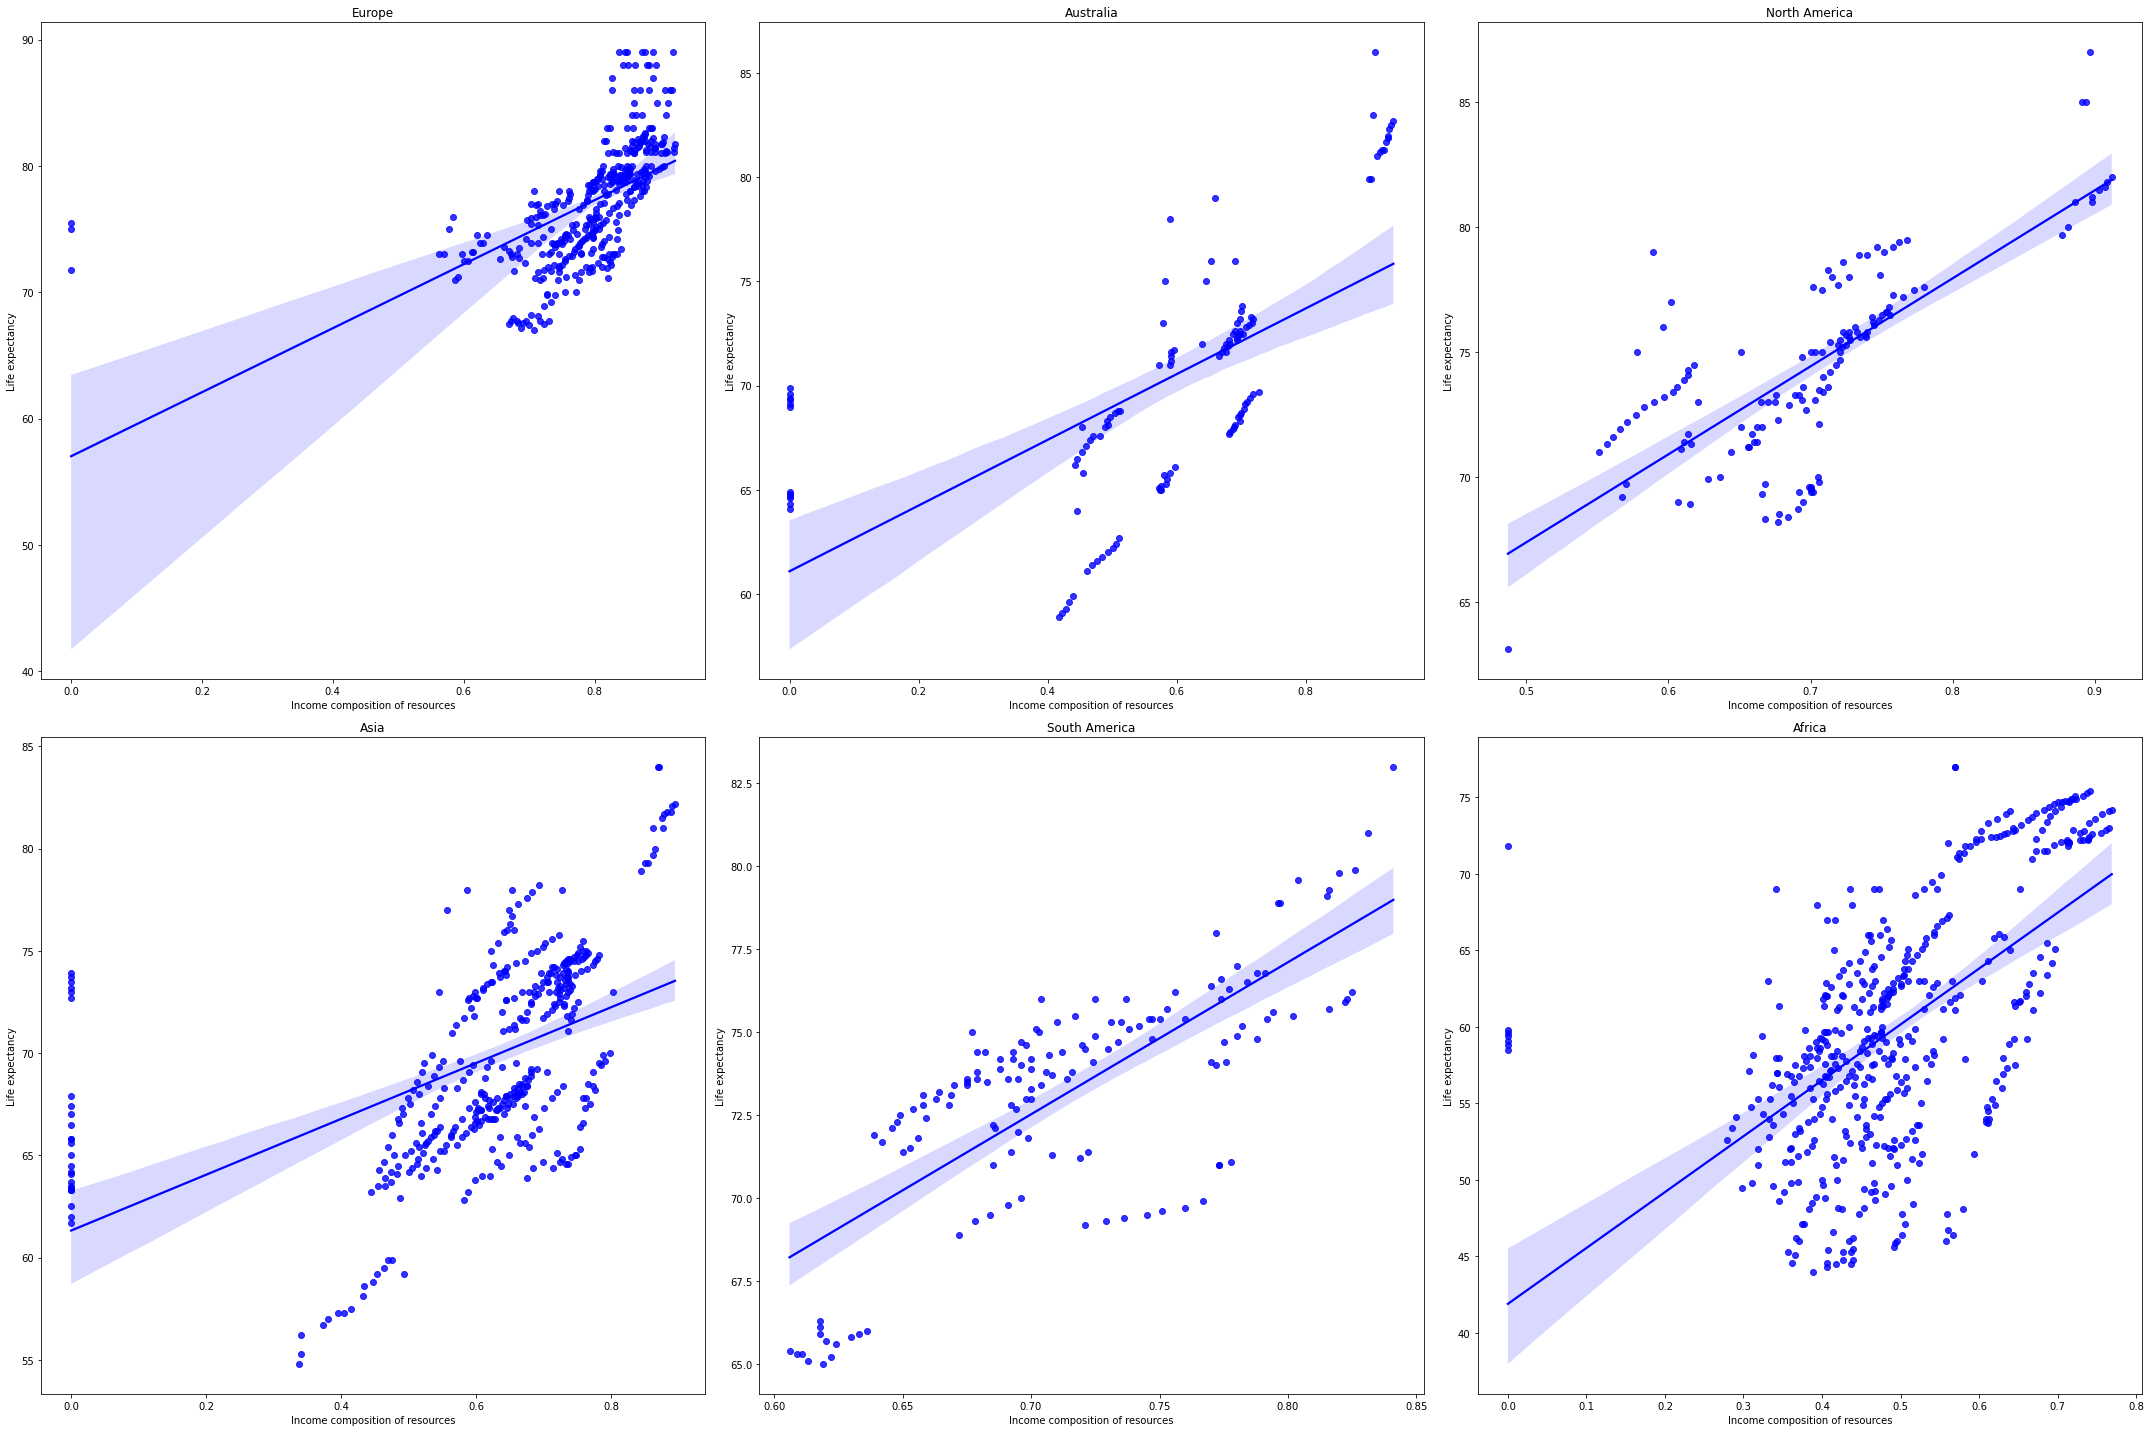

In [39]:
fig, axs = plt.subplots(2, 3,figsize=(30,20))
for continent, ax in zip(set(df["Continent"]), axs.flat):
    continents =df[df['Continent'] == continent]
    sns.regplot(x = continents['Income composition of resources'],y = continents["Life expectancy"], color = 'blue', ax = ax).set_title(continent)
plt.tight_layout()    
plt.show()


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [41]:
X=df.drop(['Year','Life expectancy','Country','Continent','Status'], axis=1)
X

Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0               263.0             62     0.01               71.279624   
1               271.0             64     0.01               73.523582   
2               268.0             66     0.01               73.219243   
3               272.0             69     0.01               78.184215   
4               275.0             71     0.01                7.097109   
...               ...            ...      ...                     ...   
2010            723.0             27     4.36                0.000000   
2011            715.0             26     4.06                0.000000   
2012             73.0             25     4.43                0.000000   
2013            686.0             25     1.72                0.000000   
2014            665.0             24     1.68                0.000000   

      Hepatitis B  Measles    BMI  under-five deaths   Polio  \
0            65.0      1154  19.1                  83    6.0   
1            62.0       492  18.6                  86   58.0   
2            64.0       430  18.1                  89   62.0   
3            67.0      2787  17.6                  93   67.0   
4            68.0      3013  17.2                  97   68.0   
...           ...       ...   ...                 ...    ...   
2010         68.0        31  27.1                  42   67.0   
2011          7.0       998  26.7                  41    7.0   
2012         73.0       304  26.3                  40   73.0   
2013         76.0       529  25.9                  39   76.0   
2014         79.0      1483  25.5                  39   78.0   

      Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0                  8.16         65.0        0.1  584.259210  33736494.0   
1                  8.18         62.0        0.1  612.696514    327582.0   
2                  8.13         64.0        0.1  631.744976  31731688.0   
3                  8.52         67.0        0.1  669.959000   3696958.0   
4                  7.87         68.0        0.1   63.537231   2978599.0   
...                 ...          ...        ...         ...         ...   
2010               7.13         65.0       33.6  454.366654  12777511.0   
2011               6.52         68.0       36.7  453.351155  12633897.0   
2012               6.53         71.0       39.8   57.348340    125525.0   
2013               6.16         75.0       42.1  548.587312  12366165.0   
2014               7.10         78.0       43.5  547.358878  12222251.0   

       thinness  1-19 years   thinness 5-9 years  \
0                      17.2                 17.3   
1                      17.5                 17.5   
2                      17.7                 17.7   
3                      17.9                 18.0   
4                      18.2                 18.2   
...                     ...                  ...   
2010                    9.4                  9.4   
2011                    9.8                  9.9   
2012                    1.2                  1.3   
2013                    1.6                  1.7   
2014                   11.0                 11.2   

      Income composition of resources  Schooling  
0                               0.479       10.1  
1                               0.476       10.0  
2                               0.470        9.9  
3                               0.463        9.8  
4                               0.454        9.5  
...                               ...        ...  
2010                            0.407        9.2  
2011                            0.418        9.5  
2012                            0.427       10.0  
2013                            0.427        9.8  
2014                            0.434        9.8  

[1647 rows x 18 columns]

In [42]:
y=df['Life expectancy']

In [43]:
X.head(2)

Adult Mortality  infant deaths  Alcohol  percentage expenditure  \
0            263.0             62     0.01               71.279624   
1            271.0             64     0.01               73.523582   

   Hepatitis B  Measles    BMI  under-five deaths   Polio  Total expenditure  \
0         65.0      1154  19.1                  83    6.0               8.16   
1         62.0       492  18.6                  86   58.0               8.18   

   Diphtheria    HIV/AIDS         GDP  Population   thinness  1-19 years  \
0         65.0        0.1  584.259210  33736494.0                   17.2   
1         62.0        0.1  612.696514    327582.0                   17.5   

    thinness 5-9 years  Income composition of resources  Schooling  
0                 17.3                            0.479       10.1  
1                 17.5                            0.476       10.0

In [44]:
min_max_scaler = MinMaxScaler()
X= min_max_scaler.fit_transform(X)

In [45]:
X

array([[0.36288089, 0.03875   , 0.        , ..., 0.61209964, 0.51175214,
        0.35757576],
       [0.37396122, 0.04      , 0.        , ..., 0.61921708, 0.50854701,
        0.35151515],
       [0.36980609, 0.04125   , 0.        , ..., 0.62633452, 0.50213675,
        0.34545455],
       ...,
       [0.09972299, 0.015625  , 0.2474804 , ..., 0.04270463, 0.45619658,
        0.35151515],
       [0.94875346, 0.015625  , 0.09574468, ..., 0.0569395 , 0.45619658,
        0.33939394],
       [0.91966759, 0.015     , 0.09350504, ..., 0.39501779, 0.46367521,
        0.33939394]])

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

linear_model= LinearRegression()

linear_model.fit(X_train,y_train)
linear_model.score(X_train,y_train)

0.8316295216702455

In [54]:
y_pred = linear_model.predict(X_test)

In [49]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, y_pred ))

Mean squared error: 12.15


In [50]:
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, y_pred ))

Mean absolute error: 2.65


In [51]:
print('R_square score: %.2f' % r2_score(y_test, y_pred))

R_square score: 0.84


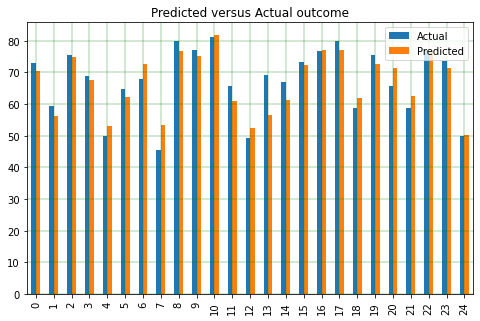

In [58]:
# Bar chart of actual vs predicted results
y_test=y_test.to_numpy()
df_output = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_output.head()
df_result = df_output.head(25)
df_result.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.35', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.35', color='grey')
plt.title('Predicted versus Actual outcome')  
plt.show()

let's change the features and choose some of them 

In [59]:
X=df[['Adult Mortality','BMI', 'Income composition of resources', 'Schooling']]

In [60]:
y=df['Life expectancy']

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

linear_model= LinearRegression()

linear_model.fit(X_train,y_train)
linear_model.score(X_train,y_train)

0.7301861897445209

In [62]:
linear_model_predict = linear_model.predict(X_test)

In [63]:
print("Mean squared error: %.2f"
      % mean_squared_error(y_test, linear_model_predict))

Mean squared error: 15.30


In [64]:
print("Mean absolute error: %.2f"
      % mean_absolute_error(y_test, linear_model_predict))

Mean absolute error: 2.80


In [65]:
print('R_square score: %.2f' % r2_score(y_test, linear_model_predict))

R_square score: 0.81


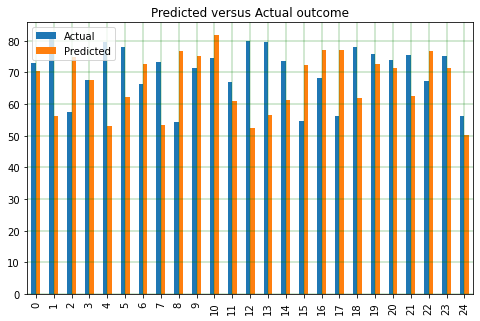

In [66]:
# Bar chart of actual vs predicted results
y_test=y_test.to_numpy()
df_output = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df_output.head()
df_result = df_output.head(25)
df_result.plot(kind='bar',figsize=(8,5))
plt.grid(which='major', linestyle='-', linewidth='0.35', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.35', color='grey')
plt.title('Predicted versus Actual outcome')  
plt.show()